In [18]:
import glob
from datetime import datetime
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

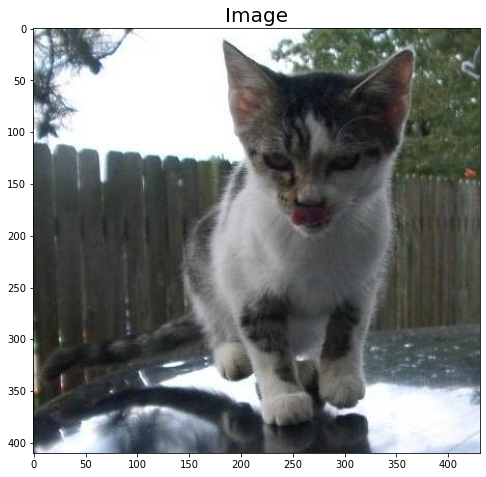

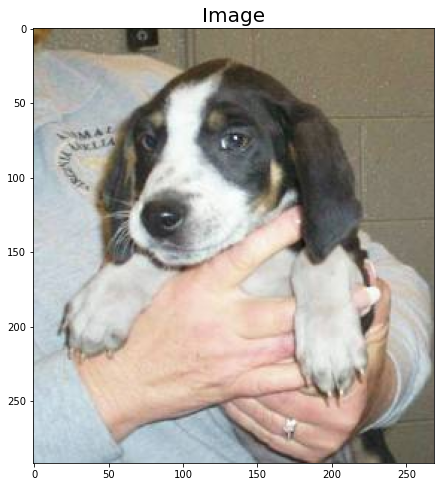

In [19]:
image_path = 'G:\data_augration\in_path\cats_dogs\\'
images = glob.glob(image_path+'*.jpg')

for fname in images:
    image = mpimg.imread(fname)
    f, (ax1) = plt.subplots(1,1,figsize=(8, 8))
    f.subplots_adjust(hspace=.2, wspace=.05)
    ax1.imshow(image)
    ax1.set_title('Image', fontsize=20)

In [20]:
image_labels = {
    'dog':0,
    'cat': 1
}

In [21]:
# 读取数据 binary格式

image_string = open('G:\data_augration\in_path\cats_dogs\dog.jpg', 'rb').read()
label = image_labels['dog']

In [22]:
# 转化实例
def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy()
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [23]:
def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

In [24]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [26]:
# 创建图像数据的Example
def image_example(image_string, label):
    image_shape = tf.image.decode_jpeg(image_string).shape
    print('图片维度:', image_shape)
    feature = {
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image_string)
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

In [28]:
# 打印部分信息
image_example_proto = image_example(image_string, label)
for line in str(image_example_proto).split('\n')[:150]:
    print(line)
print('...')

图片维度: (292, 269, 3)
features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 292
      }
    }
  }
  feature {
    key: "image_raw"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\n\007\007\010\007\006\n\010\010\010\013\n\n\013\016\030\020\016\r\r\016\035\025\026\021\030#\037%$\"\037\"!&+7/&)4)!\"0A149;>>>%.DIC<H7=>;\377\333\000C\001\n\013\013\016\r\016\034\020\020\034;(\"(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\377\300\000\021\010\001$\001\r\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\02

In [29]:
# 制作images.tfrecords文件
import os

image_path = 'G:\data_augration\in_path\cats_dogs\\'
images = glob.glob(image_path+'*.jpg')
record_file = 'images.tfrecord'
counter = 0

with tf.io.TFRecordWriter(record_file) as writer:
    for fname in images:
        with open(fname, 'rb') as f:
            image_string = f.read()
            label = image_labels[os.path.basename(fname).replace('.jpg', '')]

            tf_example = image_example(image_string, label)

            writer.write(tf_example.SerializeToString())

            counter += 1
            print('Processed {:d} of {:d} images.'.format(counter, len(images)))
print('Wrote {} images to {}'.format(counter, record_file))

图片维度: (410, 431, 3)
Processed 1 of 2 images.
图片维度: (292, 269, 3)
Processed 2 of 2 images.
Wrote 2 images to images.tfrecord


In [1]:
# 加载制作好的文件
raw_train_dataset = tf.data.TFRecordDataset('images.tfrecord')
raw_train_dataset

NameError: name 'tf' is not defined

In [2]:
# Example数据都进行了序列化， 因此没办法直接查看 需要进行反序列化操作
